#### import the necessary libraries
make sure you have installed the necessary libraries in the requirements.txt file
```bash 
pip install -r requirements.txt
```

In [36]:
import pandas as pd 
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import plotly.graph_objects as go
import pickle
from xgboost import XGBClassifier

#### Use pandas to load the data
-read the data from the csv file and display it

-extract the information about the data 

In [37]:
data_test = pd.read_csv('test.csv')

In [38]:
data_test.head()

,Unnamed: 0,card_transaction_id,member_role,time_settled,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_id,card_level_name,is_physical,payment_method,reading_method_group_name,counterparty_country_code,movement_amount_euros,is_fraud,time_settled_diff,time_settled_diff2
0,372474,210810b7-a5b9-4589-8bde-44901f6ca08b,owner,2022-01-26 20:38:35.606157,EUR,solo_basic,FR,441e3131-64ec-403a-bc4d-06a966dc30da,physical_one,True,non applicable,Other,IE,-0.39,0,80801,81087
1,568756,d5536a7f-c27a-4d54-871a-afb70cb5e7a4,owner,2022-12-02 17:58:16.532703,EUR,team_essential,FR,d6aef5de-719c-467c-9f57-1f6f8e7f2b90,physical_one,True,non applicable,Other,IE,-5.56,0,80801,81087
2,367096,d4b58166-48fe-40a1-b6da-ce96a4de8fb7,owner,2022-08-19 16:32:14.966736,USD,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,19.85,1,80801,81087
3,293504,ef1c94c4-3e64-4dd6-b3f8-de6eee3987d0,owner,2022-08-19 16:42:26.244328,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,894.17,1,611,81087
4,92,f88d66e4-3f33-4bc1-9ca4-fc08797c492a,owner,2022-08-19 16:42:58.628298,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,1061.53,1,32,643


### Credit Card Transaction Database Schema

- **card_transaction_id**  
  *Unique ID of the card payments.*

- **member_role**  
  *Account member role of the person that made the payment. It can be `owner`, `admin`, `employee`, `manager`, or `reporting`.*

- **time_settled**  
  *Date and time of the payment.*

- **price_plan_subgroup_at_time**  
  *The price plan of the Qonto Account (refer to the Qonto website for details).*

- **legal_country**  
  *The country where the company is registered.*

- **card_id**  
  *The unique ID of the card used to perform the payment.*

- **card_level_name**  
  *The level of the card, corresponding to the different card types offered.*

- **is_physical**  
  *Indicates whether the card used to pay is physical or virtual. `1` indicates a physical card.*

- **payment_method**  
  *Provides information on the payment method.*

- **reading_method_group_name**  
  *Provides information on the reading method used to perform the card payment.*

- **counterparty_country_code**  
  *Indicates the country where the payment was made.*

- **Local_amount_currency**  
  *The currency in which the payment was performed.*

- **movement_amount_euros**  
  *The amount of the payment in euros (€).*

- **is_fraud**  
  *Indicates whether the card payment is fraudulent or not. `1` means the payment is fraudulent.*

- **time_settled_diff**  
  *Indicates the velocity of the card payments. For a given company, it is the time (in seconds) between the card payment and the **previous** one.*

- **time_settled_diff2**  
  *Indicates the velocity of the card payments. For a given company, it is the time (in seconds) between the card payment and the **second previous** one.*


In [39]:
data_test.shape

(587303, 17)

In [40]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587303 entries, 0 to 587302
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   587303 non-null  int64  
 1   card_transaction_id          587303 non-null  object 
 2   member_role                  587299 non-null  object 
 3   time_settled                 587303 non-null  object 
 4   local_amount_currency        587303 non-null  object 
 5   price_plan_subgroup_at_time  587299 non-null  object 
 6   legal_country                587299 non-null  object 
 7   card_id                      587303 non-null  object 
 8   card_level_name              587303 non-null  object 
 9   is_physical                  587303 non-null  bool   
 10  payment_method               587303 non-null  object 
 11  reading_method_group_name    587303 non-null  object 
 12  counterparty_country_code    587303 non-null  object 
 13 

In [41]:
data_test['is_fraud'].value_counts()

is_fraud
0    585911
1      1392
Name: count, dtype: int64

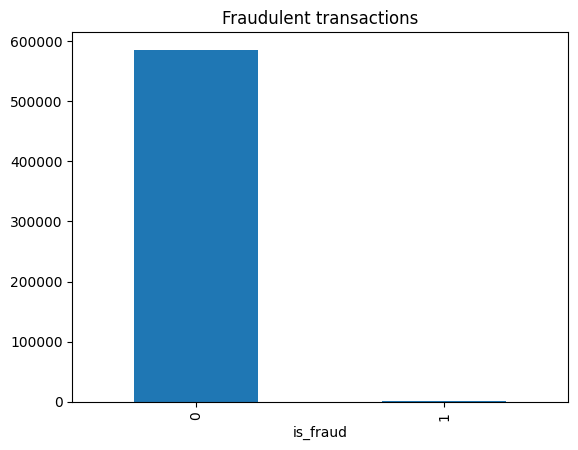

In [42]:
plot = data_test['is_fraud'].value_counts().plot(kind='bar', title='Fraudulent transactions')
plt.show()

### Use strafiied kfold to split the data into training and testing data


In [43]:
data_strafied = data_test.copy()

In [44]:
data_strafied.isnull().sum()

Unnamed: 0                     0
card_transaction_id            0
member_role                    4
time_settled                   0
local_amount_currency          0
price_plan_subgroup_at_time    4
legal_country                  4
card_id                        0
card_level_name                0
is_physical                    0
payment_method                 0
reading_method_group_name      0
counterparty_country_code      0
movement_amount_euros          0
is_fraud                       0
time_settled_diff              0
time_settled_diff2             0
dtype: int64

In [45]:
data_strafied['member_role'].value_counts()

member_role
owner        485142
admin         55793
employee      29201
manager       16644
reporting       519
Name: count, dtype: int64

In [46]:
data_strafied['price_plan_subgroup_at_time'].value_counts()

price_plan_subgroup_at_time
team_essential     228226
solo_basic         144733
team_business       99780
solo_smart          86220
team_enterprise     18484
solo_premium         9856
Name: count, dtype: int64

In [47]:
data_strafied['legal_country'].value_counts()

legal_country
FR    405761
IT    102475
ES     63417
DE     15646
Name: count, dtype: int64

In [48]:
# replace missing values with mode
data_strafied['member_role'].fillna(data_strafied['member_role'].mode()[0], inplace=True)
data_strafied['price_plan_subgroup_at_time'].fillna(data_strafied['price_plan_subgroup_at_time'].mode()[0], inplace=True)
data_strafied['legal_country'].fillna(data_strafied['legal_country'].mode()[0], inplace=True)


In [49]:
data_strafied.isnull().sum()

Unnamed: 0                     0
card_transaction_id            0
member_role                    0
time_settled                   0
local_amount_currency          0
price_plan_subgroup_at_time    0
legal_country                  0
card_id                        0
card_level_name                0
is_physical                    0
payment_method                 0
reading_method_group_name      0
counterparty_country_code      0
movement_amount_euros          0
is_fraud                       0
time_settled_diff              0
time_settled_diff2             0
dtype: int64

In [51]:
data_strafied = data_strafied.drop(columns=['Unnamed: 0'],axis=1)


In [52]:
numerical_features = data_strafied.select_dtypes(include=[np.number])
numerical_features.columns

Index(['movement_amount_euros', 'is_fraud', 'time_settled_diff',
       'time_settled_diff2'],
      dtype='object')

In [53]:
def create_temporal_features(data_stratified):
    # Conversion de time_settled en datetime si ce n'est pas déjà fait
    data_stratified['time_settled'] = pd.to_datetime(data_stratified['time_settled'])
    
    # Features basiques de temps
    data_stratified['hour'] = data_stratified['time_settled'].dt.hour
    data_stratified['day_of_week'] = data_stratified['time_settled'].dt.dayofweek
    data_stratified['month'] = data_stratified['time_settled'].dt.month
    data_stratified['is_weekend'] = data_stratified['day_of_week'].isin([5,6]).astype(int)
    data_stratified['is_night'] = data_stratified['hour'].between(23, 5).astype(int)
    
    # Features de vitesse de transaction
    data_stratified['transaction_speed'] = 1 / (data_stratified['time_settled_diff'] + 1)
    data_stratified['transaction_acceleration'] = (
        data_stratified['time_settled_diff2'] - data_stratified['time_settled_diff']
    )
    data_stratified['rapid_succession'] = (data_stratified['time_settled_diff'] < 300).astype(int)
    
    return data_stratified

data_strafied = create_temporal_features(data_strafied)

In [54]:
data_strafied.head()

,card_transaction_id,member_role,time_settled,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_id,card_level_name,is_physical,payment_method,...,time_settled_diff,time_settled_diff2,hour,day_of_week,month,is_weekend,is_night,transaction_speed,transaction_acceleration,rapid_succession
0,210810b7-a5b9-4589-8bde-44901f6ca08b,owner,2022-01-26 20:38:35.606157,EUR,solo_basic,FR,441e3131-64ec-403a-bc4d-06a966dc30da,physical_one,True,non applicable,...,80801,81087,20,2,1,0,0,0.000012,286,0
1,d5536a7f-c27a-4d54-871a-afb70cb5e7a4,owner,2022-12-02 17:58:16.532703,EUR,team_essential,FR,d6aef5de-719c-467c-9f57-1f6f8e7f2b90,physical_one,True,non applicable,...,80801,81087,17,4,12,0,0,0.000012,286,0
2,d4b58166-48fe-40a1-b6da-ce96a4de8fb7,owner,2022-08-19 16:32:14.966736,USD,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,80801,81087,16,4,8,0,0,0.000012,286,0
3,ef1c94c4-3e64-4dd6-b3f8-de6eee3987d0,owner,2022-08-19 16:42:26.244328,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,611,81087,16,4,8,0,0,0.001634,80476,0
4,f88d66e4-3f33-4bc1-9ca4-fc08797c492a,owner,2022-08-19 16:42:58.628298,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,32,643,16,4,8,0,0,0.030303,611,1


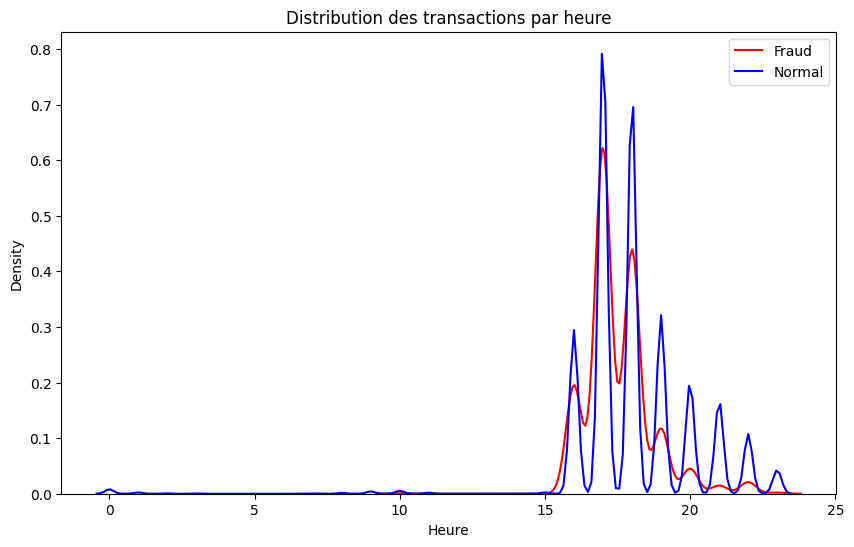

In [57]:
# plot hour of the day is fraud vs not fraud
plt.figure(figsize=(10,6))
sns.kdeplot(data=data_strafied[data_strafied['is_fraud']==1], x='hour', label='Fraud', color='red')
sns.kdeplot(data=data_strafied[data_strafied['is_fraud']==0], x='hour', label='Normal', color='blue')
plt.title('Distribution des transactions par heure')
plt.xlabel('Heure')
plt.legend()
plt.show()

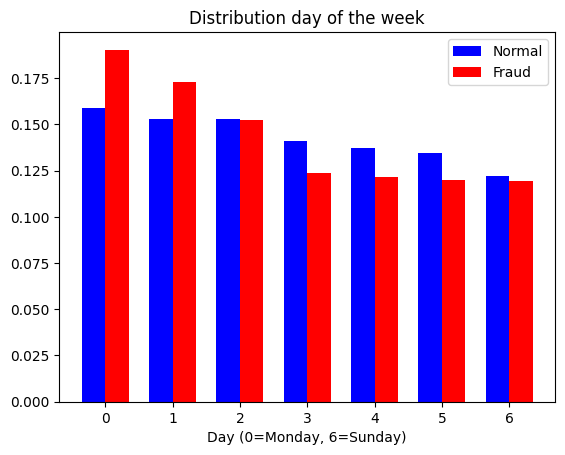

In [60]:
fraud_dow = data_strafied[data_strafied['is_fraud']==1]['day_of_week'].value_counts(normalize=True)
normal_dow = data_strafied[data_strafied['is_fraud']==0]['day_of_week'].value_counts(normalize=True)
x = np.arange(7)
width = 0.35
plt.bar(x - width/2, normal_dow, width, label='Normal', color='blue')
plt.bar(x + width/2, fraud_dow, width, label='Fraud', color='red')
plt.title('Distribution day of the week')
plt.xlabel('Day (0=Monday, 6=Sunday)')
plt.legend()

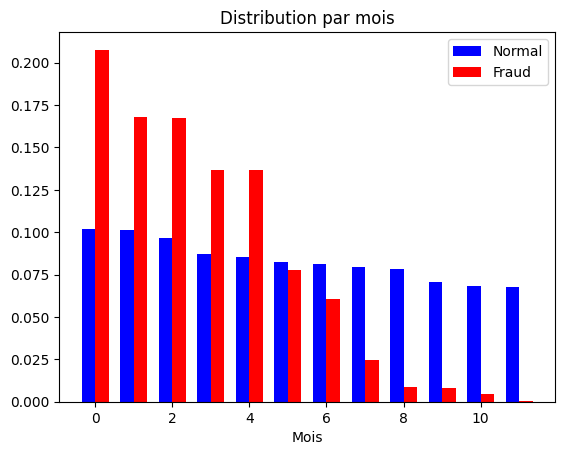

In [62]:
fraud_month = data_strafied[data_strafied['is_fraud']==1]['month'].value_counts(normalize=True)
normal_month = data_strafied[data_strafied['is_fraud']==0]['month'].value_counts(normalize=True)
x = np.arange(12)
plt.bar(x - width/2, normal_month, width, label='Normal', color='blue')
plt.bar(x + width/2, fraud_month, width, label='Fraud', color='red')
plt.title('Distribution par mois')
plt.xlabel('Mois')
plt.legend()

Text(0.5, 0, 'Fraude (0=No, 1=Yes)')

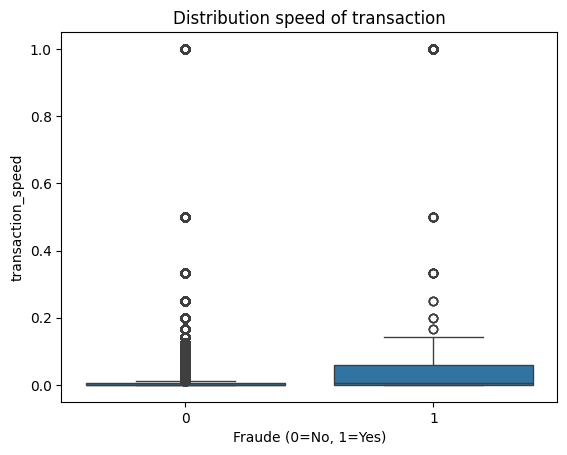

In [68]:
sns.boxplot(x='is_fraud', y='transaction_speed', data=data_strafied)
plt.title('Distribution speed of transaction')
plt.xlabel('Fraude (0=No, 1=Yes)')

Text(0.5, 1.0, 'corr matrix')

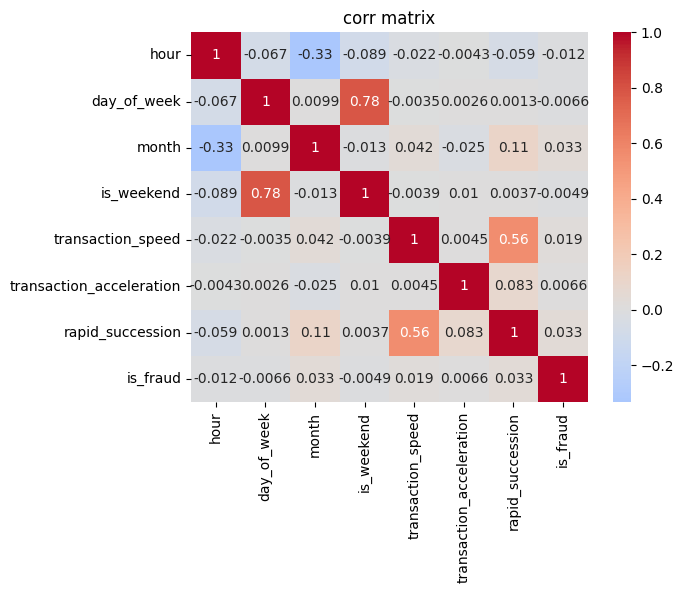

In [71]:
temporal_features = ['hour', 'day_of_week', 'month', 'is_weekend', 
                    'transaction_speed', 'transaction_acceleration', 'rapid_succession', 'is_fraud']
correlation_matrix = data_strafied[temporal_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('corr matrix')

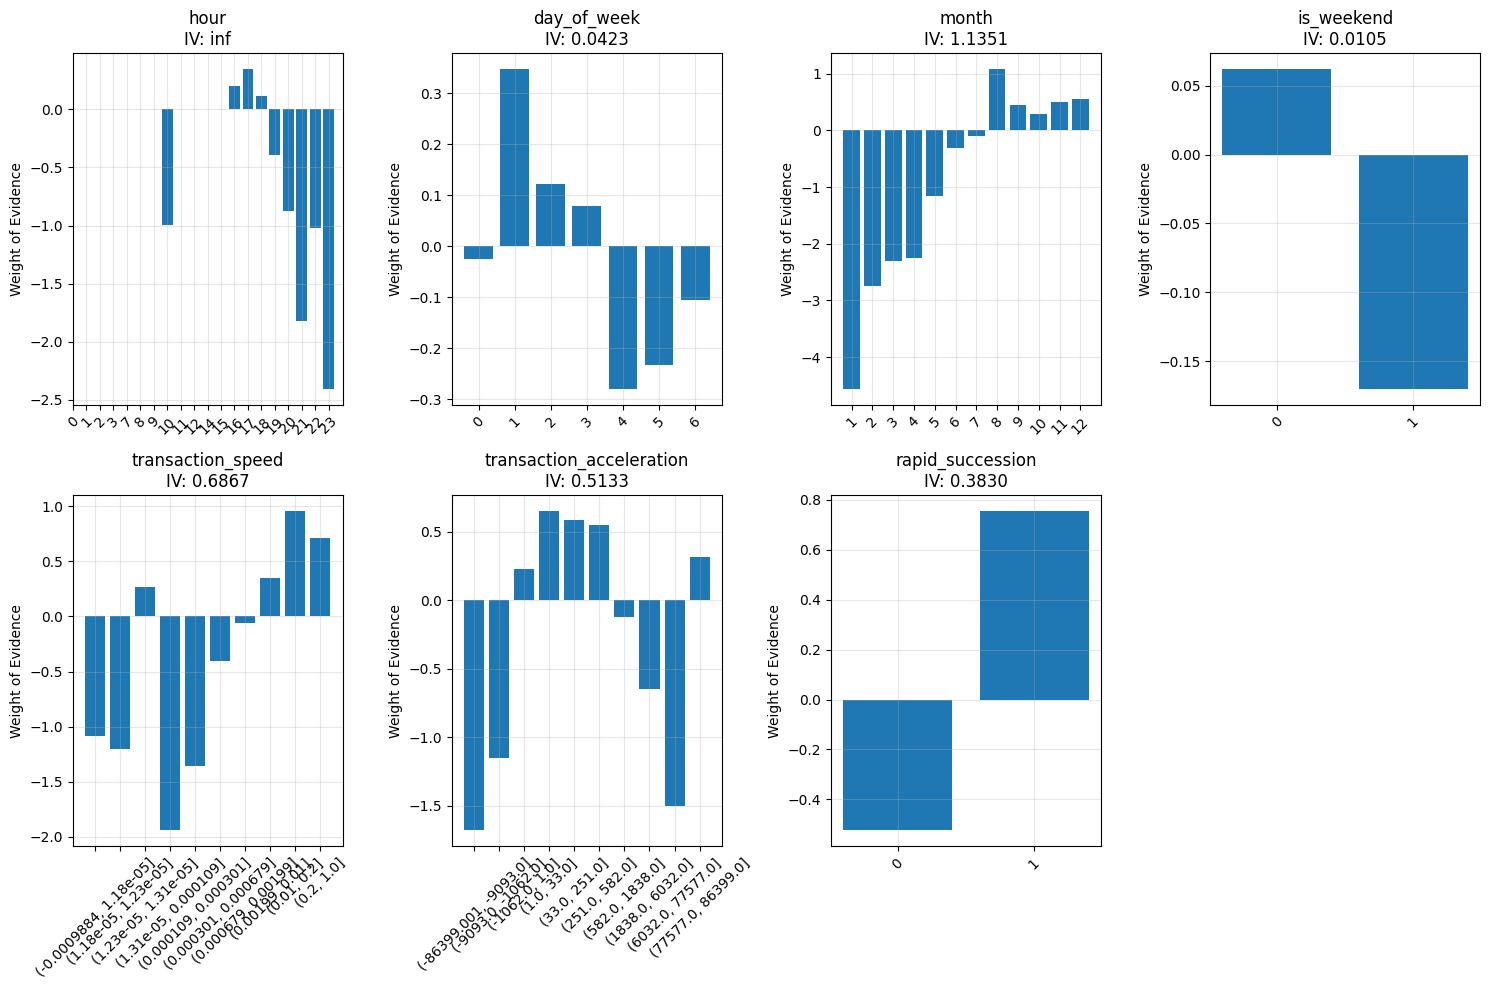


Information Values par feature (triées):
hour: inf
month: 1.1351
transaction_speed: 0.6867
transaction_acceleration: 0.5133
rapid_succession: 0.3830
day_of_week: 0.0423
is_weekend: 0.0105


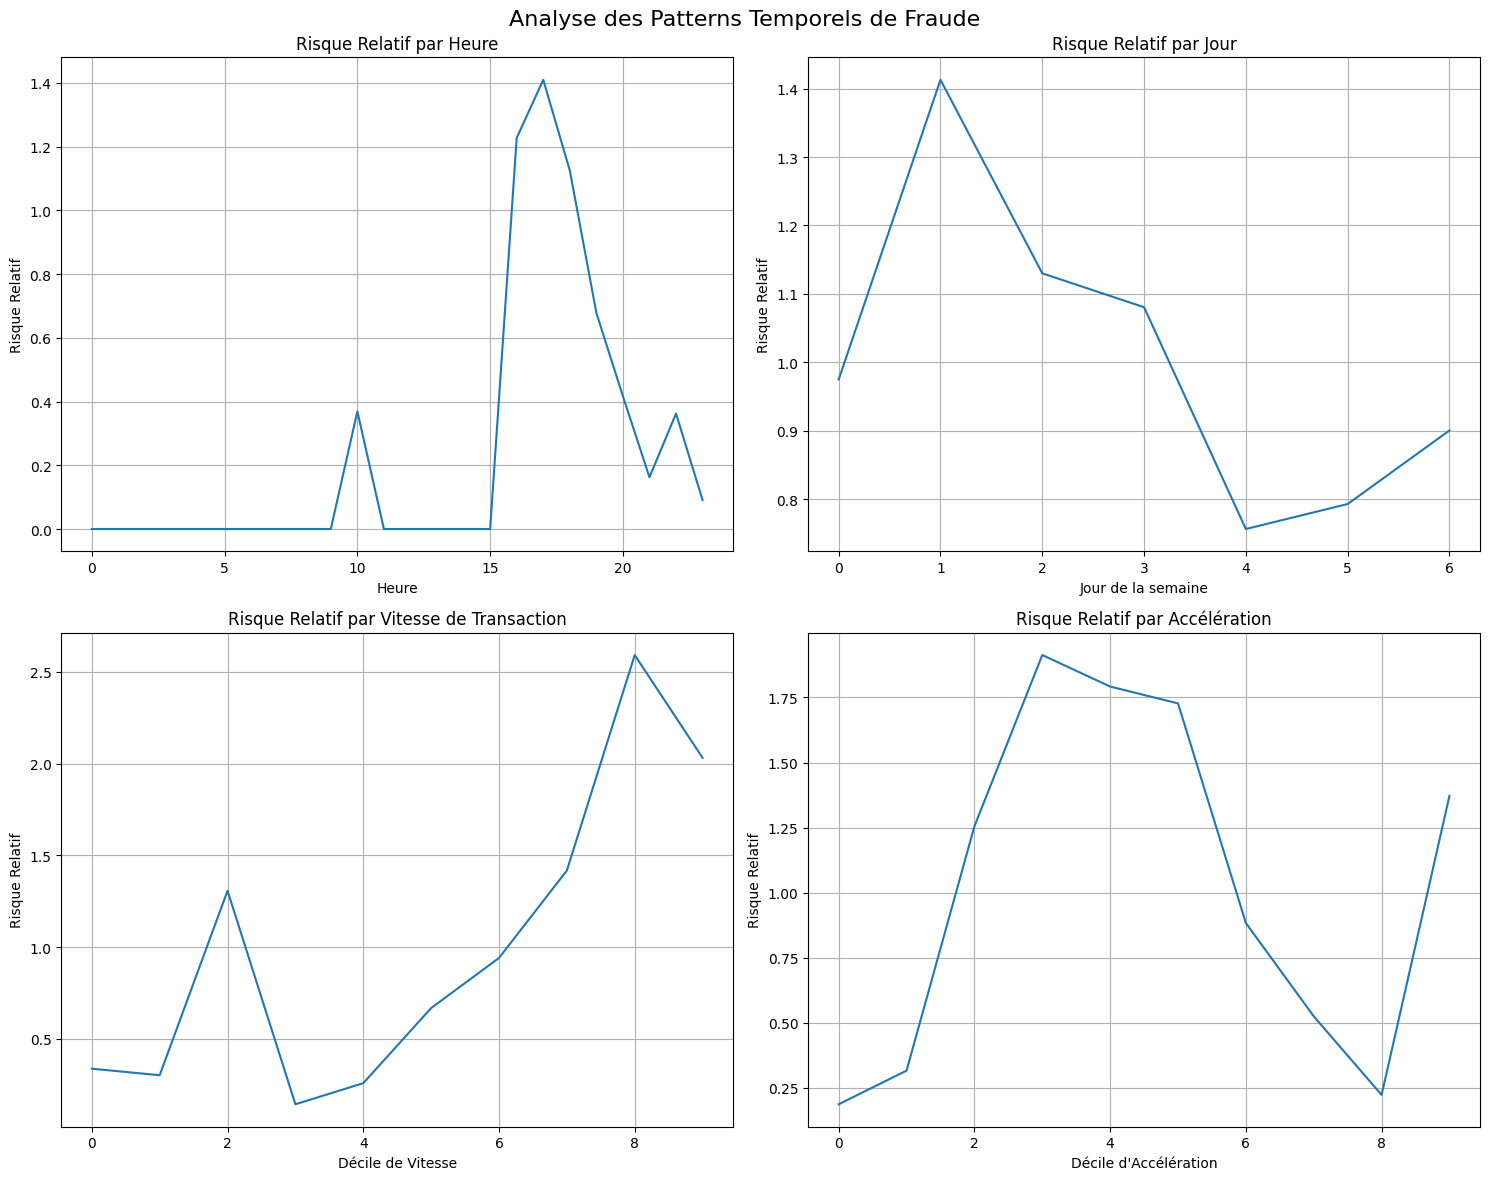


Périodes avec le plus haut risque relatif:

hour:
       count  fraud_rate  relative_risk  significance
hour                                                 
17    178117    0.003341       1.409401      0.409523
16     63957    0.002908       1.227009      0.136071
18    157159    0.002666       1.124858      0.117318
19     69690    0.001607       0.678064     -0.201434
20     43555    0.000987       0.416537     -0.288609

day_of_week:
             count  fraud_rate  relative_risk  significance
day_of_week                                                
1            79137    0.003349       1.412828      0.275255
2            89972    0.002679       1.130141      0.092522
3            82775    0.002561       1.080587      0.054953
0            71825    0.002311       0.975114     -0.015808
6            80576    0.002135       0.900629     -0.066856


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def calculate_iv_woe(data, feature, target, bins=10):
    """
    Calcule l'Information Value et le Weight of Evidence
    """
    # Si la feature est numérique, la discrétiser
    if data[feature].dtype in ['int64', 'float64']:
        data = data.copy()
        data[feature] = pd.qcut(data[feature], bins, duplicates='drop')
    
    # Calcul des totaux
    total_good = (data[target] == 0).sum()
    total_bad = (data[target] == 1).sum()
    
    # Groupement et calculs
    grouped = data.groupby(feature)[target].agg(['count', 'sum'])
    grouped['non_fraud'] = grouped['count'] - grouped['sum']
    grouped['non_fraud_rate'] = grouped['non_fraud'] / total_good
    grouped['fraud_rate'] = grouped['sum'] / total_bad
    grouped['woe'] = np.log(grouped['fraud_rate'] / grouped['non_fraud_rate'])
    grouped['iv'] = (grouped['fraud_rate'] - grouped['non_fraud_rate']) * grouped['woe']
    
    return grouped, grouped['iv'].sum()

# Calculer IV et WOE pour chaque feature temporelle
temporal_features = ['hour', 'day_of_week', 'month', 'is_weekend',
                    'transaction_speed', 'transaction_acceleration', 'rapid_succession']

# Création du graphique
plt.figure(figsize=(15, 10))

# Stockage des IV pour comparaison
iv_values = {}

for idx, feature in enumerate(temporal_features, 1):
    grouped, iv = calculate_iv_woe(data_strafied, feature, 'is_fraud')
    iv_values[feature] = iv
    
    plt.subplot(2, 4, idx)
    plt.bar(range(len(grouped)), grouped['woe'])
    plt.title(f'{feature}\nIV: {iv:.4f}')
    plt.xticks(range(len(grouped)), grouped.index, rotation=45)
    plt.ylabel('Weight of Evidence')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Afficher les Information Values triées
print("\nInformation Values par feature (triées):")
iv_sorted = pd.Series(iv_values).sort_values(ascending=False)
for feature, iv in iv_sorted.items():
    print(f"{feature}: {iv:.4f}")

# Analyse des patterns temporels
def analyze_temporal_patterns(data, feature, target='is_fraud'):
    """
    Analyse les patterns temporels en calculant les taux de fraude relatifs
    """
    # Calcul du taux de fraude global
    global_fraud_rate = data[target].mean()
    
    # Calcul des taux de fraude par catégorie
    grouped = data.groupby(feature).agg({
        target: ['count', 'mean']
    })
    
    grouped.columns = ['count', 'fraud_rate']
    grouped['relative_risk'] = grouped['fraud_rate'] / global_fraud_rate
    grouped['significance'] = np.sqrt(grouped['count']) * (grouped['fraud_rate'] - global_fraud_rate)
    
    return grouped

# Visualisation des patterns temporels
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analyse des Patterns Temporels de Fraude', size=16)

# Heures
hourly_patterns = analyze_temporal_patterns(data_strafied, 'hour')
axes[0, 0].plot(hourly_patterns.index, hourly_patterns['relative_risk'])
axes[0, 0].set_title('Risque Relatif par Heure')
axes[0, 0].set_xlabel('Heure')
axes[0, 0].set_ylabel('Risque Relatif')
axes[0, 0].grid(True)

# Jours de la semaine
daily_patterns = analyze_temporal_patterns(data_strafied, 'day_of_week')
axes[0, 1].plot(daily_patterns.index, daily_patterns['relative_risk'])
axes[0, 1].set_title('Risque Relatif par Jour')
axes[0, 1].set_xlabel('Jour de la semaine')
axes[0, 1].set_ylabel('Risque Relatif')
axes[0, 1].grid(True)

# Vitesse de transaction
speed_patterns = analyze_temporal_patterns(data_strafied, pd.qcut(data_strafied['transaction_speed'], 10))
axes[1, 0].plot(range(len(speed_patterns)), speed_patterns['relative_risk'])
axes[1, 0].set_title('Risque Relatif par Vitesse de Transaction')
axes[1, 0].set_xlabel('Décile de Vitesse')
axes[1, 0].set_ylabel('Risque Relatif')
axes[1, 0].grid(True)

# Accélération
accel_patterns = analyze_temporal_patterns(data_strafied, pd.qcut(data_strafied['transaction_acceleration'], 10))
axes[1, 1].plot(range(len(accel_patterns)), accel_patterns['relative_risk'])
axes[1, 1].set_title('Risque Relatif par Accélération')
axes[1, 1].set_xlabel('Décile d\'Accélération')
axes[1, 1].set_ylabel('Risque Relatif')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Afficher les périodes les plus risquées
print("\nPériodes avec le plus haut risque relatif:")
for feature in ['hour', 'day_of_week']:
    patterns = analyze_temporal_patterns(data_strafied, feature)
    print(f"\n{feature}:")
    print(patterns.sort_values('relative_risk', ascending=False).head())

In [78]:
# 2. Features géographiques
def create_geographic_features(data_stratified):
    data_stratified['is_foreign_transaction'] = (
        data_stratified['counterparty_country_code'] != data_stratified['legal_country']
    ).astype(int)
    
    # Créer un dictionnaire des pays à risque (à adapter selon vos besoins)
    high_risk_countries = ['FR' ,'IT' ,'ES' ,'DE']  # À remplacer par votre liste
    data_stratified['is_high_risk_country'] = (
        data_stratified['counterparty_country_code'].isin(high_risk_countries)
    ).astype(int)
    
    return data_stratified

data_strafied = create_geographic_features(data_strafied)

In [79]:
data_strafied['legal_country'].value_counts()


legal_country
FR    405765
IT    102475
ES     63417
DE     15646
Name: count, dtype: int64

In [80]:
data_strafied.head()

,card_transaction_id,member_role,time_settled,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_id,card_level_name,is_physical,payment_method,...,hour,day_of_week,month,is_weekend,is_night,transaction_speed,transaction_acceleration,rapid_succession,is_foreign_transaction,is_high_risk_country
0,210810b7-a5b9-4589-8bde-44901f6ca08b,owner,2022-01-26 20:38:35.606157,EUR,solo_basic,FR,441e3131-64ec-403a-bc4d-06a966dc30da,physical_one,True,non applicable,...,20,2,1,0,0,0.000012,286,0,1,0
1,d5536a7f-c27a-4d54-871a-afb70cb5e7a4,owner,2022-12-02 17:58:16.532703,EUR,team_essential,FR,d6aef5de-719c-467c-9f57-1f6f8e7f2b90,physical_one,True,non applicable,...,17,4,12,0,0,0.000012,286,0,1,0
2,d4b58166-48fe-40a1-b6da-ce96a4de8fb7,owner,2022-08-19 16:32:14.966736,USD,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,16,4,8,0,0,0.000012,286,0,1,0
3,ef1c94c4-3e64-4dd6-b3f8-de6eee3987d0,owner,2022-08-19 16:42:26.244328,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,16,4,8,0,0,0.001634,80476,0,1,0
4,f88d66e4-3f33-4bc1-9ca4-fc08797c492a,owner,2022-08-19 16:42:58.628298,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,16,4,8,0,0,0.030303,611,1,1,0



Statistiques détaillées par pays:
   counterparty_country_code  nb_transactions  nb_frauds  fraud_rate  \
13                        DE              799          0      0.0000   
17                        ES              136          0      0.0000   
19                        FR            33130          3      0.0001   
32                        IT             8445          0      0.0000   

    total_amount  avg_amount  
13     156732.37    196.1607  
17       7579.31     55.7302  
19    6286592.05    189.7553  
32     256574.67     30.3818  


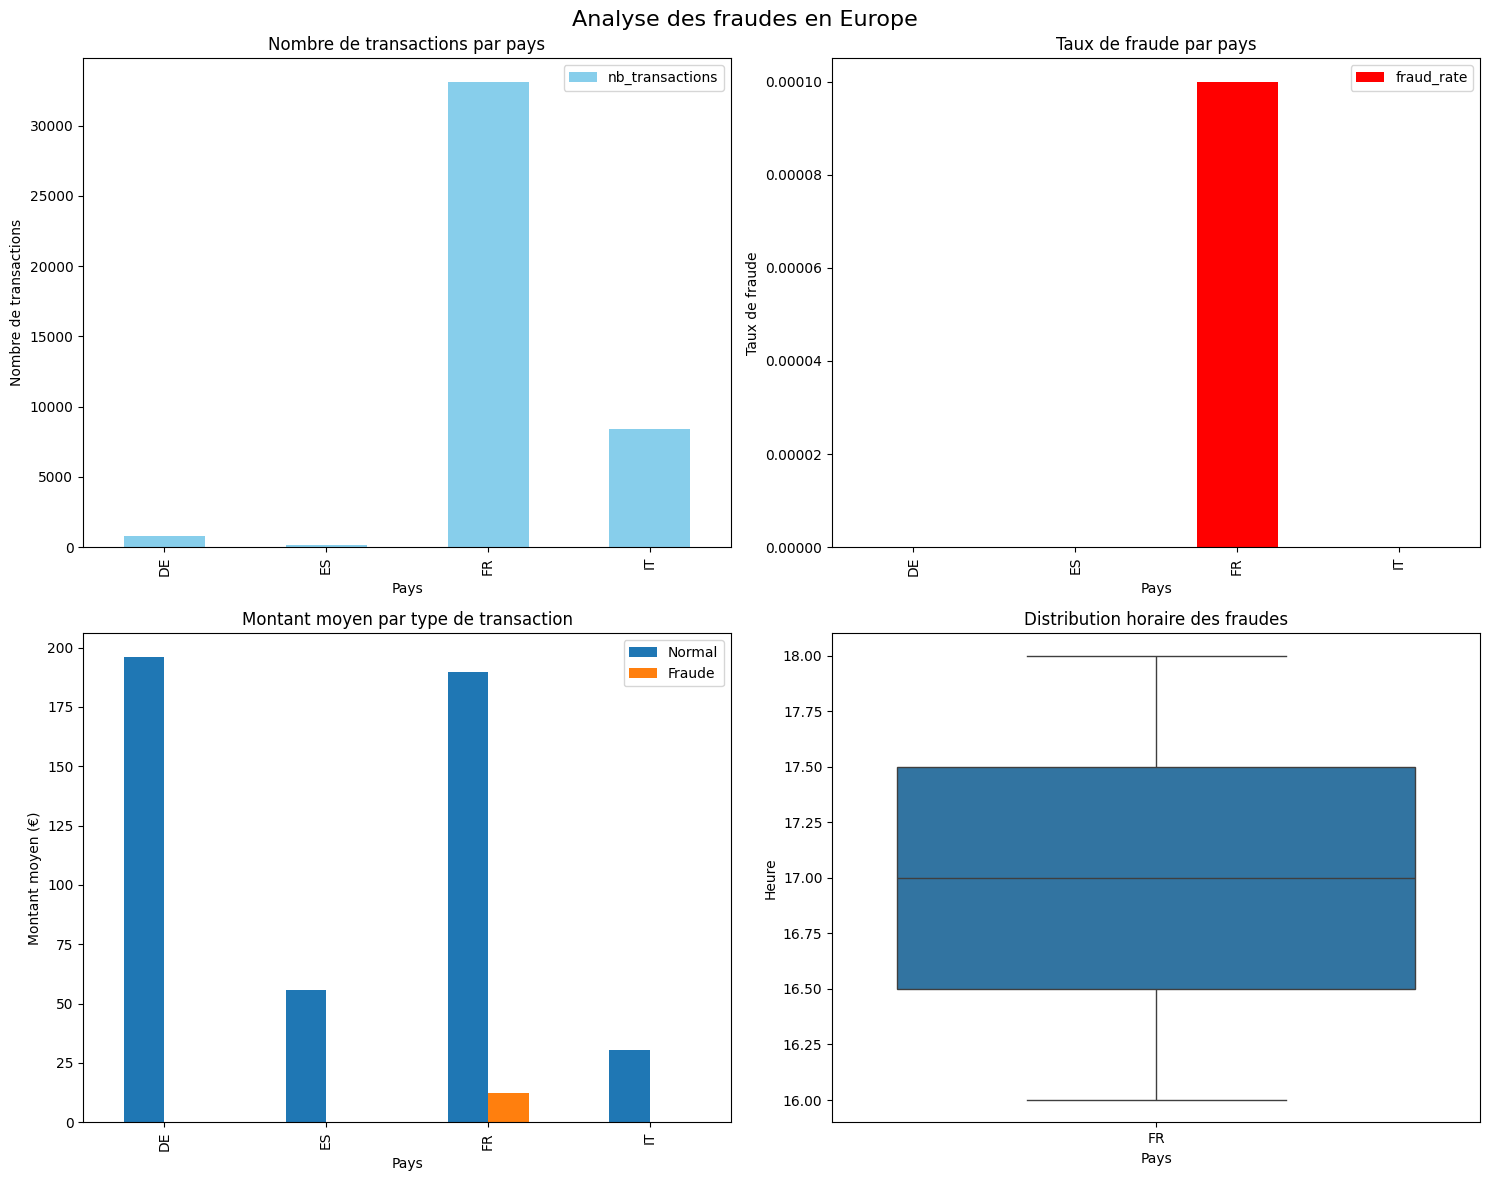

<Figure size 1200x600 with 0 Axes>

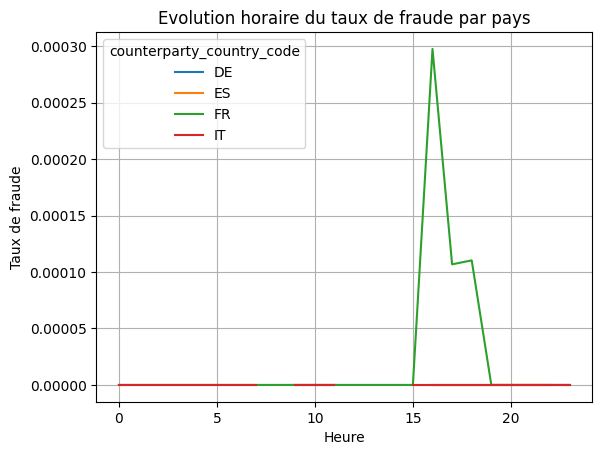

In [84]:
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_european_fraud_patterns(data_stratified):
    # Définition des pays et leurs coordonnées
    european_countries = {
        'FR': {'name': 'France', 'lat': 46.2276, 'lon': 2.2137},
        'IT': {'name': 'Italie', 'lat': 41.8719, 'lon': 12.5674},
        'ES': {'name': 'Espagne', 'lat': 40.4637, 'lon': -3.7492},
        'DE': {'name': 'Allemagne', 'lat': 51.1657, 'lon': 10.4515}
    }

    # Création de la carte centrée sur l'Europe
    europe_map = folium.Map(location=[48, 7], zoom_start=5)

    # Calcul des statistiques par pays
    country_stats = data_stratified.groupby('counterparty_country_code').agg({
        'card_transaction_id': 'count',
        'is_fraud': ['sum', 'mean'],
        'movement_amount_euros': ['sum', 'mean']
    }).round(4)

    country_stats.columns = ['nb_transactions', 'nb_frauds', 'fraud_rate', 'total_amount', 'avg_amount']
    country_stats = country_stats.reset_index()

    # Création des cercles proportionnels et popups pour chaque pays
    for country_code, country_info in european_countries.items():
        country_data = country_stats[country_stats['counterparty_country_code'] == country_code].iloc[0]
        
        # Création du contenu du popup
        popup_content = f"""
        <div style="font-family: Arial; width: 200px;">
            <h4>{country_info['name']}</h4>
            <hr>
            <b>Transactions:</b> {int(country_data['nb_transactions']):,}<br>
            <b>Fraudes:</b> {int(country_data['nb_frauds']):,}<br>
            <b>Taux de fraude:</b> {(country_data['fraud_rate']*100):.2f}%<br>
            <b>Montant total:</b> {country_data['total_amount']:,.2f}€<br>
            <b>Montant moyen:</b> {country_data['avg_amount']:,.2f}€
        </div>
        """
        
        # Ajout du cercle sur la carte
        folium.CircleMarker(
            location=[country_info['lat'], country_info['lon']],
            radius=np.sqrt(country_data['nb_transactions'])/10,
            popup=folium.Popup(popup_content, max_width=300),
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=country_data['fraud_rate'],
            opacity=0.7
        ).add_to(europe_map)

    # Créer des visualisations supplémentaires avec matplotlib
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Analyse des fraudes en Europe', fontsize=16)

    # 1. Nombre de transactions par pays
    country_stats[country_stats['counterparty_country_code'].isin(['FR', 'IT', 'ES', 'DE'])].plot(
        kind='bar',
        x='counterparty_country_code',
        y='nb_transactions',
        ax=axes[0,0],
        color='skyblue'
    )
    axes[0,0].set_title('Nombre de transactions par pays')
    axes[0,0].set_xlabel('Pays')
    axes[0,0].set_ylabel('Nombre de transactions')

    # 2. Taux de fraude par pays
    country_stats[country_stats['counterparty_country_code'].isin(['FR', 'IT', 'ES', 'DE'])].plot(
        kind='bar',
        x='counterparty_country_code',
        y='fraud_rate',
        ax=axes[0,1],
        color='red'
    )
    axes[0,1].set_title('Taux de fraude par pays')
    axes[0,1].set_xlabel('Pays')
    axes[0,1].set_ylabel('Taux de fraude')

    # 3. Montant moyen des transactions par pays
    avg_amount_by_fraud = data_stratified[data_stratified['counterparty_country_code'].isin(['FR', 'IT', 'ES', 'DE'])].groupby(
        ['counterparty_country_code', 'is_fraud'])['movement_amount_euros'].mean().unstack()
    
    avg_amount_by_fraud.plot(
        kind='bar',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Montant moyen par type de transaction')
    axes[1,0].set_xlabel('Pays')
    axes[1,0].set_ylabel('Montant moyen (€)')
    axes[1,0].legend(['Normal', 'Fraude'])

    # 4. Distribution horaire des fraudes par pays
    fraud_data = data_stratified[
        (data_stratified['is_fraud'] == 1) & 
        (data_stratified['counterparty_country_code'].isin(['FR', 'IT', 'ES', 'DE']))
    ]
    
    sns.boxplot(
        x='counterparty_country_code',
        y='hour',
        data=fraud_data,
        ax=axes[1,1]
    )
    axes[1,1].set_title('Distribution horaire des fraudes')
    axes[1,1].set_xlabel('Pays')
    axes[1,1].set_ylabel('Heure')

    plt.tight_layout()
    
    return europe_map, country_stats

# Créer les visualisations
map_viz, stats = visualize_european_fraud_patterns(data_strafied)

# Sauvegarder la carte
map_viz.save('europe_fraud_map.html')

# Afficher les statistiques détaillées
print("\nStatistiques détaillées par pays:")
print(stats[stats['counterparty_country_code'].isin(['FR', 'IT', 'ES', 'DE'])])

# Analyse des patterns temporels par pays
temporal_patterns = data_strafied[
    data_strafied['counterparty_country_code'].isin(['FR', 'IT', 'ES', 'DE'])
].pivot_table(
    index='hour',
    columns='counterparty_country_code',
    values='is_fraud',
    aggfunc='mean'
)


plt.figure(figsize=(12, 6))
temporal_patterns.plot(kind='line')
plt.title('Evolution horaire du taux de fraude par pays')
plt.xlabel('Heure')
plt.ylabel('Taux de fraude')
plt.grid(True)
plt.show()

<p align="center">
  <img src="map.PNG" width="1000">
</p>

Calculating temporal risk...
Calculating geographic risk...
Calculating historical risk...
Calculating role risk...
Calculating composite risk score...


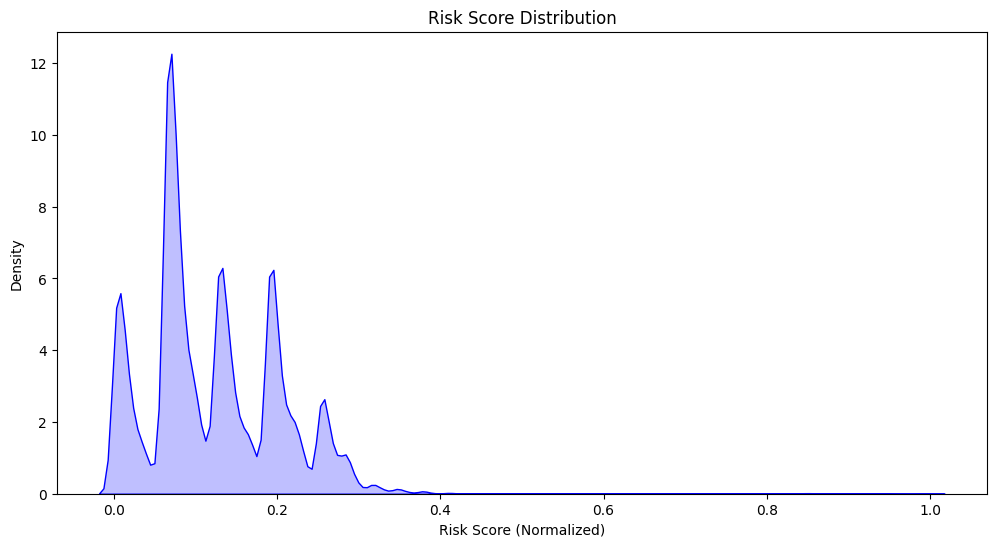

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_risk_features(data):
    """
    Creates risk features based on available columns
    """
    # Initialize risk features dataframe
    risk_features = pd.DataFrame(index=data.index)

    # 1. Temporal Risk 
    def calculate_temporal_risk(row):
        risk = 0
        # Night and weekend risk
        if row['is_night'] == 1:
            risk += 0.3
        if row['is_weekend'] == 1:
            risk += 0.2
        # Transaction velocity risk
        if row['rapid_succession'] == 1:
            risk += 0.4
        if row['transaction_acceleration'] > 0:
            risk += 0.2
        return risk

    # 2. Geographic Risk
    def calculate_geographic_risk(row):
        risk = 0
        if row['is_foreign_transaction'] == 1:
            risk += 0.3
        if row['is_high_risk_country'] == 1:
            risk += 0.5
        return risk

    # 3. Transaction Risk
    def calculate_transaction_risk(data, row):
        risk = 0
        # Amount risk
        amount_percentile = pd.qcut(data['movement_amount_euros'].rank(method='first'), 
                                  q=10, labels=False)
        if amount_percentile.loc[row.name] >= 8:
            risk += 0.4
        
        if row['reading_method_group_name'] == 'MANUAL_ENTRY':
            risk += 0.3
        if row['is_physical'] == 0:
            risk += 0.2
        return risk

    # 4. Historical Risk (using existing card_fraud_rate and card_transaction_count)
    def calculate_historical_risk(row):
        risk = 0
        risk += row['card_fraud_rate'] * 2  # Historical fraud rate has high weight
        risk += 1 / (row['card_transaction_count'] + 1)  # New cards are riskier
        return risk

    # Create base risk features
    print("Calculating temporal risk...")
    risk_features['temporal_risk'] = data.apply(calculate_temporal_risk, axis=1)
    
    print("Calculating geographic risk...")
    risk_features['geographic_risk'] = data.apply(calculate_geographic_risk, axis=1)
    
    
    print("Calculating historical risk...")
    risk_features['historical_risk'] = data.apply(calculate_historical_risk, axis=1)
    
    # Role Risk
    print("Calculating role risk...")
    role_risk_mapping = {
        'owner': 0.1,
        'admin': 0.2,
        'employee': 0.4,
        'manager': 0.3,
        'reporting': 0.5
    }
    risk_features['role_risk'] = data['member_role'].map(role_risk_mapping)
    
    # Composite Risk Score
    print("Calculating composite risk score...")
    risk_features['composite_risk_score'] = (
        risk_features['temporal_risk'] * 0.3 +
        risk_features['geographic_risk'] * 0.3 +
        risk_features['historical_risk'] * 0.3 +
        risk_features['role_risk'] * 0.1
    )
    
    # Normalize final score
    risk_features['risk_score_normalized'] = (
        (risk_features['composite_risk_score'] - risk_features['composite_risk_score'].min()) /
        (risk_features['composite_risk_score'].max() - risk_features['composite_risk_score'].min())
    )
    
    # Visualizations
    plt.figure(figsize=(12, 6))
    sns.kdeplot(risk_features['risk_score_normalized'], shade=True, color='blue')
    plt.title('Risk Score Distribution')
    plt.xlabel('Risk Score (Normalized)')
    plt.ylabel('Density')
    plt.show()
    
    return risk_features

# Usage
risk_features = create_risk_features(data_strafied)

In [101]:
def categorize_risk(score):
    if score < 0.2:
        return 'Very Low'
    elif score < 0.4:
        return 'Low'
    elif score < 0.6:
        return 'Medium'
    elif score < 0.8:
        return 'High'
    else:
        return 'Very High'

risk_features['risk_category'] = risk_features['risk_score_normalized'].apply(categorize_risk)

In [102]:
risk_features.head()

,temporal_risk,geographic_risk,historical_risk,role_risk,composite_risk_score,risk_score_normalized,risk_category
0,0.2,0.3,0.500,0.1,0.3100,0.221015,Low
1,0.2,0.3,0.500,0.1,0.3100,0.221015,Low
2,0.2,0.3,2.125,0.1,0.7975,0.734198,High
3,0.2,0.3,2.125,0.1,0.7975,0.734198,High
4,0.6,0.3,2.125,0.1,0.9175,0.860520,Very High


In [103]:
risk_features.shape

(587303, 7)

In [104]:
data_strafied.shape

(587303, 28)

In [105]:
data_final = data_strafied.merge(risk_features, left_index=True, right_index=True)
data_final.head()

,card_transaction_id,member_role,time_settled,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_id,card_level_name,is_physical,payment_method,...,is_high_risk_country,card_fraud_rate,card_transaction_count,temporal_risk,geographic_risk,historical_risk,role_risk,composite_risk_score,risk_score_normalized,risk_category
0,210810b7-a5b9-4589-8bde-44901f6ca08b,owner,2022-01-26 20:38:35.606157,EUR,solo_basic,FR,441e3131-64ec-403a-bc4d-06a966dc30da,physical_one,True,non applicable,...,0,0.0,1,0.2,0.3,0.500,0.1,0.3100,0.221015,Low
1,d5536a7f-c27a-4d54-871a-afb70cb5e7a4,owner,2022-12-02 17:58:16.532703,EUR,team_essential,FR,d6aef5de-719c-467c-9f57-1f6f8e7f2b90,physical_one,True,non applicable,...,0,0.0,1,0.2,0.3,0.500,0.1,0.3100,0.221015,Low
2,d4b58166-48fe-40a1-b6da-ce96a4de8fb7,owner,2022-08-19 16:32:14.966736,USD,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,0,1.0,7,0.2,0.3,2.125,0.1,0.7975,0.734198,High
3,ef1c94c4-3e64-4dd6-b3f8-de6eee3987d0,owner,2022-08-19 16:42:26.244328,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,0,1.0,7,0.2,0.3,2.125,0.1,0.7975,0.734198,High
4,f88d66e4-3f33-4bc1-9ca4-fc08797c492a,owner,2022-08-19 16:42:58.628298,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,...,0,1.0,7,0.6,0.3,2.125,0.1,0.9175,0.860520,Very High


In [110]:
#feature selection for ML model
features =[
    # temporal features
    'hour', 'day_of_week', 'month', 'is_weekend',
    'transaction_speed', 'transaction_acceleration', 'rapid_succession',
    
    # graphical features
    'is_foreign_transaction', 'is_high_risk_country',
    
    # card features
    'is_physical', 'card_fraud_rate', 'card_transaction_count',
    
    # Risk features
    'temporal_risk', 'geographic_risk',
    'historical_risk', 'role_risk', 'risk_score_normalized'
]

data_final = data_final[features + ['is_fraud']]

In [111]:
data_final.head()

,hour,day_of_week,month,is_weekend,transaction_speed,transaction_acceleration,rapid_succession,is_foreign_transaction,is_high_risk_country,is_physical,card_fraud_rate,card_transaction_count,temporal_risk,geographic_risk,historical_risk,role_risk,risk_score_normalized,is_fraud
0,20,2,1,0,0.000012,286,0,1,0,True,0.0,1,0.2,0.3,0.500,0.1,0.221015,0
1,17,4,12,0,0.000012,286,0,1,0,True,0.0,1,0.2,0.3,0.500,0.1,0.221015,0
2,16,4,8,0,0.000012,286,0,1,0,True,1.0,7,0.2,0.3,2.125,0.1,0.734198,1
3,16,4,8,0,0.001634,80476,0,1,0,True,1.0,7,0.2,0.3,2.125,0.1,0.734198,1
4,16,4,8,0,0.030303,611,1,1,0,True,1.0,7,0.6,0.3,2.125,0.1,0.860520,1


Text(0.5, 1.0, 'Correlation Matrix')

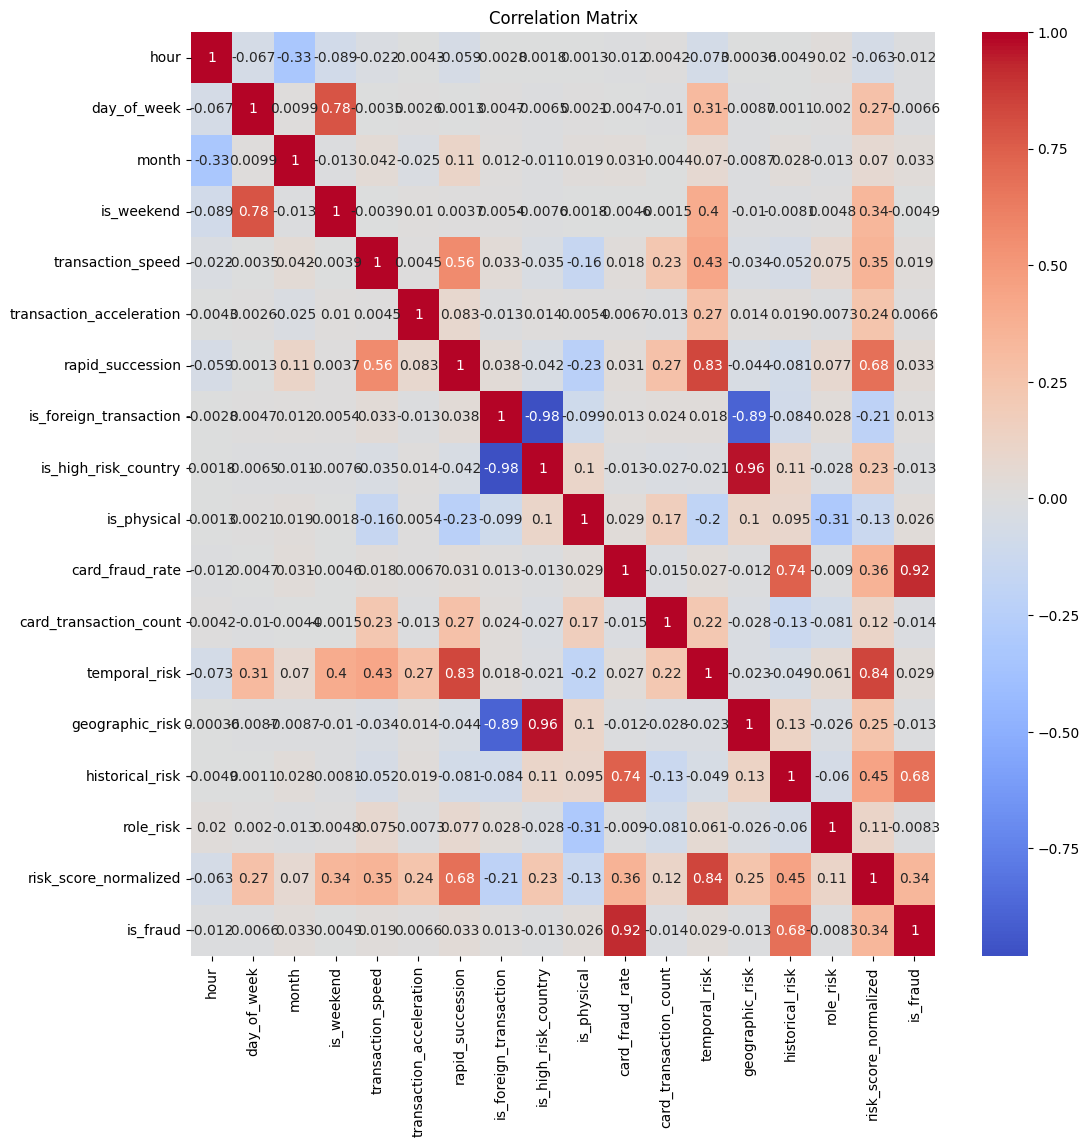

In [113]:
correlation_matrix = data_final.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

# Définir les métriques communes
def get_scoring():
    return {
        'roc_auc': 'roc_auc',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }

# Fonction de préparation des données
def prepare_data(data_final, features):
    X = data_final[features]
    y = data_final['is_fraud']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [136]:
# Préparation des donnée
X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(data_final, features)

In [140]:

import xgboost as xgb
from scipy.stats import uniform, randint

# Paramètres XGBoost
xgb_params = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 500)
}

def train_xgboost(X_train, y_train, stratified_kfold, scoring):
    model = xgb.XGBClassifier(random_state=42)
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=xgb_params,
        n_iter=10,
        cv=stratified_kfold,
        scoring=scoring,
        refit='roc_auc',
        random_state=42,
    )
    
    random_search.fit(X_train, y_train)
    return random_search

In [141]:
# Xgboost 
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = get_scoring()

xgb_model = train_xgboost(X_train_scaled, y_train, stratified_kfold, scoring)

In [143]:
#test the model
def test_model(model, X_test, y_test, scaler):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Inverse scaling for test data
    X_test_inverse = scaler.inverse_transform(X_test)
    
    return y_pred, y_proba, X_test_inverse

# Test the model
y_pred, y_proba, X_test_inverse = test_model(xgb_model, X_test_scaled, y_test, scaler)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9997
ROC AUC: 0.9973
Precision: 0.9355
Recall: 0.9388
F1 Score: 0.9372


In [144]:
# save the model
filename = 'xgboost_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))


In [147]:
# 3_random_forest_model.ipynb

from sklearn.ensemble import RandomForestClassifier

# Paramètres Random Forest
rf_params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
}

def train_random_forest(X_train, y_train, stratified_kfold, scoring):
    model = RandomForestClassifier(random_state=42)
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=rf_params,
        n_iter=1,
        cv=stratified_kfold,
        scoring=scoring,
        refit='roc_auc',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    random_search.fit(X_train, y_train)
    return random_search

In [148]:
# random forest
rf_model = train_random_forest(X_train_scaled, y_train, stratified_kfold, scoring)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [152]:
# save the model 
filename = 'random_forest_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))


In [167]:
#test the model
y_pred, y_proba, X_test_inverse = test_model(rf_model, X_test_scaled, y_test, scaler)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9996
ROC AUC: 0.9988
Precision: 0.9338
Recall: 0.9137
F1 Score: 0.9236


In [149]:
# 4_logistic_regression_model.ipynb

from sklearn.linear_model import LogisticRegression

# Paramètres Logistic Regression
lr_params = {
    'C': uniform(0.001, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

def train_logistic_regression(X_train, y_train, stratified_kfold, scoring):
    model = LogisticRegression(random_state=42)
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=lr_params,
        n_iter=1,
        cv=stratified_kfold,
        scoring=scoring,
        refit='roc_auc',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    random_search.fit(X_train, y_train)
    return random_search

In [ ]:
LogisticRegression_model = train_logistic_regression(X_train_scaled, y_train, stratified_kfold, scoring)

In [150]:
# 5_ebm_model.ipynb

from interpret.glassbox import ExplainableBoostingClassifier

# Paramètres EBM
ebm_params = {
    'max_bins': randint(8, 512),
    'max_rounds': randint(100, 5000),
    'learning_rate': uniform(0.001, 0.1),
    'interactions': randint(0, 20),
    'min_samples_leaf': randint(2, 50)
}

def train_ebm(X_train, y_train, stratified_kfold, scoring):
    model = ExplainableBoostingClassifier(random_state=42)
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=ebm_params,
        n_iter=1,
        cv=stratified_kfold,
        scoring=scoring,
        refit='roc_auc',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    random_search.fit(X_train, y_train)
    return random_search

In [151]:
Ebm_model = train_ebm(X_train_scaled, y_train, stratified_kfold, scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [153]:
#save the model
filename = 'ebm_model.pkl'
pickle.dump(Ebm_model, open(filename, 'wb'))

In [155]:
# 1. Faire des prédictions
y_pred = Ebm_model.predict(X_test_scaled)
y_pred_proba = Ebm_model.predict_proba(X_test_scaled)[:, 1]

# 2. Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 3. Afficher les résultats
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.9997
ROC AUC: 0.9892
Precision: 0.9341
Recall: 0.9173
F1 Score: 0.9256


In [162]:
from interpret import show

# Afficher une explication globale du modèle EBM
ebm_global = Ebm_model.best_estimator_.explain_global()  # Récupérer le meilleur modèle entraîné
show(ebm_global)


<!-- http://127.0.0.1:7001/1373282830096/ -->

In [165]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

# Récupérer l'objet global expliquant le modèle
ebm_model = Ebm_model.best_estimator_  # Meilleur modèle entraîné
global_explanation = ebm_model.explain_global()  # Explication globale

# Obtenir les noms des features et leurs scores
feature_names = global_explanation.data()["names"]  # Noms des features
feature_scores = global_explanation.data()["scores"]  # Scores des features

# Construire l'équation finale
equation = "y = intercept"
for feature_name, score in zip(feature_names, feature_scores):
    equation += f" + {score:.4f} * f_{feature_name}(X_{feature_name})"

# Afficher l'équation
print("Équation Finale du Modèle EBM :")
print(equation)


Équation Finale du Modèle EBM :
y = intercept + 0.1740 * f_feature_0000(X_feature_0000) + 0.3356 * f_feature_0001(X_feature_0001) + 1.0759 * f_feature_0002(X_feature_0002) + 0.0325 * f_feature_0003(X_feature_0003) + 0.5687 * f_feature_0004(X_feature_0004) + 0.2416 * f_feature_0005(X_feature_0005) + 0.0626 * f_feature_0006(X_feature_0006) + 0.1164 * f_feature_0007(X_feature_0007) + 0.1892 * f_feature_0008(X_feature_0008) + 0.4373 * f_feature_0009(X_feature_0009) + 0.4499 * f_feature_0010(X_feature_0010) + 1.3649 * f_feature_0011(X_feature_0011) + 0.0256 * f_feature_0012(X_feature_0012) + 0.1551 * f_feature_0013(X_feature_0013) + 1.8880 * f_feature_0014(X_feature_0014) + 0.0748 * f_feature_0015(X_feature_0015) + 1.0895 * f_feature_0016(X_feature_0016) + 0.2271 * f_feature_0002 & feature_0004(X_feature_0002 & feature_0004) + 0.0860 * f_feature_0004 & feature_0005(X_feature_0004 & feature_0005) + 0.4132 * f_feature_0004 & feature_0010(X_feature_0004 & feature_0010) + 0.5050 * f_feature_000

#### resample the data
- resample the data to have a balanced dataset


In [6]:
data_test['is_fraud'].value_counts()

is_fraud
0    585911
1      1392
Name: count, dtype: int64

In [7]:
from sklearn.utils import resample
fraud = data_test[data_test['is_fraud'] == 1]
not_fraud = data_test[data_test['is_fraud'] == 0]

non_fraud_downsampled = resample(not_fraud, 
                                 replace=False,    # ne pas échantillonner avec remplacement
                                 n_samples=len(fraud),  # nombre d'échantillons égaux à la classe minoritaire
                                 random_state=42)


In [8]:
data = pd.concat([fraud, non_fraud_downsampled])

In [9]:
data.head()

,Unnamed: 0,card_transaction_id,member_role,time_settled,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_id,card_level_name,is_physical,payment_method,reading_method_group_name,counterparty_country_code,movement_amount_euros,is_fraud,time_settled_diff,time_settled_diff2
2,367096,d4b58166-48fe-40a1-b6da-ce96a4de8fb7,owner,2022-08-19 16:32:14.966736,USD,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,19.85,1,80801,81087
3,293504,ef1c94c4-3e64-4dd6-b3f8-de6eee3987d0,owner,2022-08-19 16:42:26.244328,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,894.17,1,611,81087
4,92,f88d66e4-3f33-4bc1-9ca4-fc08797c492a,owner,2022-08-19 16:42:58.628298,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,1061.53,1,32,643
5,146894,94a52640-0809-4910-b19d-02d5b37c234c,owner,2022-08-19 17:20:27.010413,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,397.85,1,2248,2280
6,440661,8d682e0b-0879-41ec-ac24-2eab489e6ddf,owner,2022-08-19 17:20:27.355828,VND,solo_basic,IT,f4b90919-2dc0-4b63-b38c-d048aebd88bb,physical_one,True,online,VAD,IE,382.23,1,0,2248


In [10]:
data.shape

(2784, 17)

<Axes: xlabel='is_fraud'>

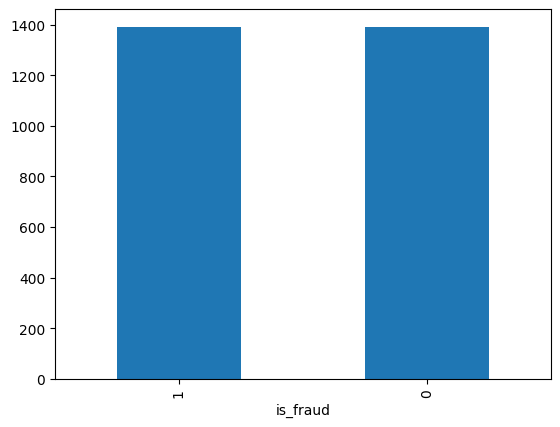

In [11]:
data['is_fraud'].value_counts()

data['is_fraud'].value_counts(normalize=True)

data['is_fraud'].value_counts().plot(kind='bar')

data['is_fraud'].value_counts(normalize=True).plot(kind='bar')


In [12]:
data.isnull().sum() 

Unnamed: 0                     0
card_transaction_id            0
member_role                    0
time_settled                   0
local_amount_currency          0
price_plan_subgroup_at_time    0
legal_country                  0
card_id                        0
card_level_name                0
is_physical                    0
payment_method                 0
reading_method_group_name      0
counterparty_country_code      0
movement_amount_euros          0
is_fraud                       0
time_settled_diff              0
time_settled_diff2             0
dtype: int64

In [13]:
data.columns

Index(['Unnamed: 0', 'card_transaction_id', 'member_role', 'time_settled',
       'local_amount_currency', 'price_plan_subgroup_at_time', 'legal_country',
       'card_id', 'card_level_name', 'is_physical', 'payment_method',
       'reading_method_group_name', 'counterparty_country_code',
       'movement_amount_euros', 'is_fraud', 'time_settled_diff',
       'time_settled_diff2'],
      dtype='object')

#### Drop the columns that are not useful for the model

In [14]:
data = data.drop(columns=['Unnamed: 0','card_transaction_id','card_id'],axis=1)


In [126]:
data.head()

NameError: name 'data' is not defined

#### convert time to data time and extract the hour, day, month, year


In [16]:
data['time_settled'] = pd.to_datetime(data['time_settled'])
data['trans_day']=data['time_settled'].dt.day
data['trans_month']=data['time_settled'].dt.month
data['trans_year']=data['time_settled'].dt.year
data['trans_hour']=data['time_settled'].dt.hour
data['trans_minute']=data['time_settled'].dt.minute
data.drop(columns=['time_settled'],inplace=True)

In [17]:
data.head()

,member_role,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_level_name,is_physical,payment_method,reading_method_group_name,counterparty_country_code,movement_amount_euros,is_fraud,time_settled_diff,time_settled_diff2,trans_day,trans_month,trans_year,trans_hour,trans_minute
2,owner,USD,solo_basic,IT,physical_one,True,online,VAD,IE,19.85,1,80801,81087,19,8,2022,16,32
3,owner,VND,solo_basic,IT,physical_one,True,online,VAD,IE,894.17,1,611,81087,19,8,2022,16,42
4,owner,VND,solo_basic,IT,physical_one,True,online,VAD,IE,1061.53,1,32,643,19,8,2022,16,42
5,owner,VND,solo_basic,IT,physical_one,True,online,VAD,IE,397.85,1,2248,2280,19,8,2022,17,20
6,owner,VND,solo_basic,IT,physical_one,True,online,VAD,IE,382.23,1,0,2248,19,8,2022,17,20


#### encode the categorical columns

In [18]:
# manual mapping owner
data['member_role'].value_counts()

member_role
owner        2393
admin         245
employee       94
manager        51
reporting       1
Name: count, dtype: int64

In [19]:
memberRole = {
    'owner' :1,
    'admin':2,
    'employee':3,
    'manager':4,
    'reporting':5,
}

data['member_role'] = data['member_role'].map(memberRole)

In [20]:
#local_amount_currency mapping 
data['local_amount_currency'].value_counts()


local_amount_currency
EUR    1543
VND     594
USD     413
THB      84
TWD      32
GBP      31
MYR      12
HKD      10
AUD       9
CHF       7
GTQ       6
JPY       4
ILS       4
MAD       4
PHP       3
MXN       3
MOP       3
CZK       2
AED       2
PLN       2
CAD       2
DKK       2
EGP       2
RON       2
PEN       2
CLP       1
NOK       1
ARS       1
IDR       1
ISK       1
TRY       1
Name: count, dtype: int64

In [21]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['local_amount_currency'] = le.fit_transform(data['local_amount_currency'])

In [22]:
data['local_amount_currency'].value_counts()

local_amount_currency
9     1543
30     594
29     413
26      84
28      32
10      31
20      12
12      10
2        9
4        7
11       6
16       4
14       4
17       4
23       3
19       3
18       3
6        2
0        2
24       2
3        2
7        2
8        2
25       2
22       2
5        1
21       1
1        1
13       1
15       1
27       1
Name: count, dtype: int64

In [23]:
data.head()

,member_role,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_level_name,is_physical,payment_method,reading_method_group_name,counterparty_country_code,movement_amount_euros,is_fraud,time_settled_diff,time_settled_diff2,trans_day,trans_month,trans_year,trans_hour,trans_minute
2,1,29,solo_basic,IT,physical_one,True,online,VAD,IE,19.85,1,80801,81087,19,8,2022,16,32
3,1,30,solo_basic,IT,physical_one,True,online,VAD,IE,894.17,1,611,81087,19,8,2022,16,42
4,1,30,solo_basic,IT,physical_one,True,online,VAD,IE,1061.53,1,32,643,19,8,2022,16,42
5,1,30,solo_basic,IT,physical_one,True,online,VAD,IE,397.85,1,2248,2280,19,8,2022,17,20
6,1,30,solo_basic,IT,physical_one,True,online,VAD,IE,382.23,1,0,2248,19,8,2022,17,20


In [24]:
data["price_plan_subgroup_at_time"].value_counts()

price_plan_subgroup_at_time
solo_basic         897
team_essential     891
solo_smart         459
team_business      350
team_enterprise    153
solo_premium        34
Name: count, dtype: int64

In [25]:
pricePlanSubgroup = {
    'solo_basic' :1,
    'team_essential' :2,
    'solo_smart' :3,
    'team_business' :4,
    'team_enterprise' :5,
    'solo_premium' :6,
}

data['price_plan_subgroup_at_time'] = data['price_plan_subgroup_at_time'].map(pricePlanSubgroup)


In [26]:
data['legal_country'].value_counts()

legal_country
FR    1989
IT     397
ES     299
DE      99
Name: count, dtype: int64

In [27]:
#manual mapping legal_country
manualCountry = {
    'FR':1,
    'IT':2,
    'ES':3,
    'DE':4,
}

data['legal_country'] = data['legal_country'].map(manualCountry)

In [28]:
data['card_level_name'].value_counts()

card_level_name
physical_one     1349
virtual_one       788
physical_x        370
physical_plus     276
virtual_flash       1
Name: count, dtype: int64

In [29]:
# manual mapping 
cardLevelName = {
    'physical_one' :1,
    'virtual_one' :2,
    'physical_x' :3,
    'physical_plus' :4,
    'virtual_flash':5,
}

data['card_level_name'] = data['card_level_name'].map(cardLevelName)


In [30]:
#label encoding
l2 = LabelEncoder()
data['is_physical'] = l2.fit_transform(data['is_physical'])

data['is_physical'].value_counts()

is_physical
1    1995
0     789
Name: count, dtype: int64

In [31]:
data["payment_method"].value_counts()

payment_method
online            2671
non applicable      53
unknown             32
offline             28
Name: count, dtype: int64

In [32]:
data['payment_method'] = l2.fit_transform(data['payment_method'])
data['payment_method'].value_counts()

payment_method
2    2671
0      53
3      32
1      28
Name: count, dtype: int64

In [33]:
data["reading_method_group_name"].value_counts()

reading_method_group_name
VAD      2671
Other      86
Chip       27
Name: count, dtype: int64

In [34]:
mapping = {
    'VAD':1,
    'Other':2,
    'Chip' :3,
}

data['reading_method_group_name'] = data['reading_method_group_name'].map(mapping)

In [35]:
data['counterparty_country_code'] = l2.fit_transform(data['counterparty_country_code'])
data['counterparty_country_code'].value_counts()

counterparty_country_code
5     2612
2       99
13      34
7       20
10       5
3        5
0        2
12       1
6        1
8        1
9        1
4        1
1        1
11       1
Name: count, dtype: int64

In [36]:
data.head()

,member_role,local_amount_currency,price_plan_subgroup_at_time,legal_country,card_level_name,is_physical,payment_method,reading_method_group_name,counterparty_country_code,movement_amount_euros,is_fraud,time_settled_diff,time_settled_diff2,trans_day,trans_month,trans_year,trans_hour,trans_minute
2,1,29,1,2,1,1,2,1,5,19.85,1,80801,81087,19,8,2022,16,32
3,1,30,1,2,1,1,2,1,5,894.17,1,611,81087,19,8,2022,16,42
4,1,30,1,2,1,1,2,1,5,1061.53,1,32,643,19,8,2022,16,42
5,1,30,1,2,1,1,2,1,5,397.85,1,2248,2280,19,8,2022,17,20
6,1,30,1,2,1,1,2,1,5,382.23,1,0,2248,19,8,2022,17,20


#### Correlation matrix to see the correlation between the features

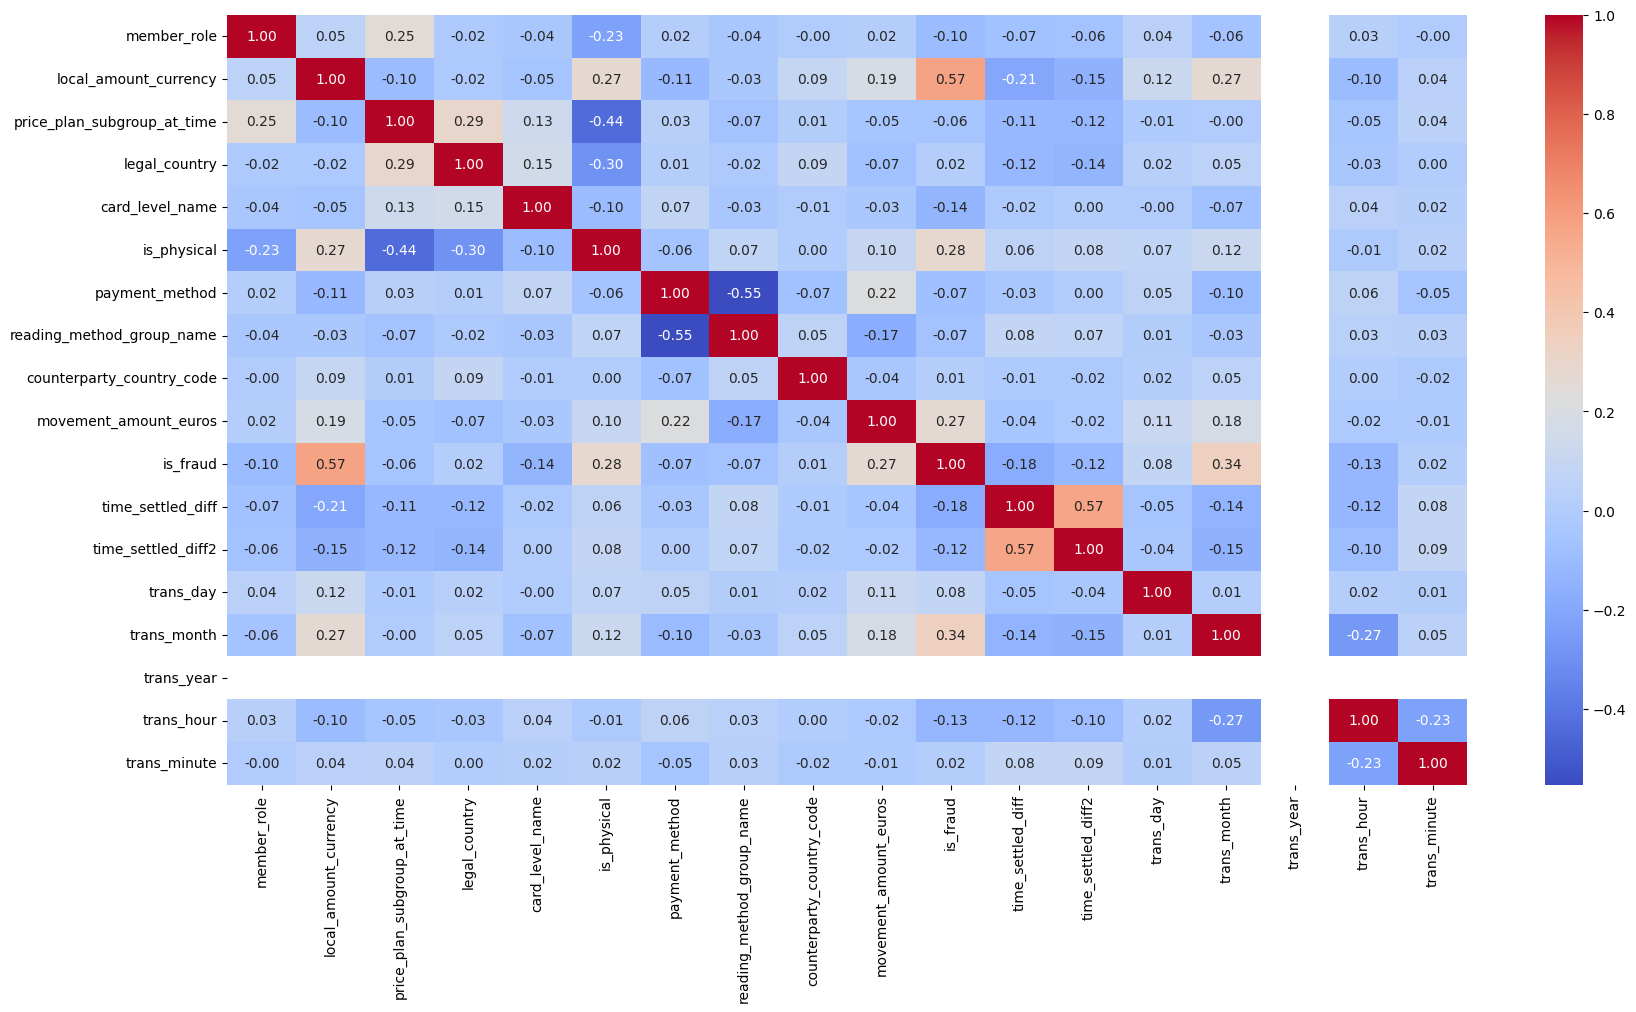

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt='.2f')
plt.show()


use a threshold of 0.7 to drop the columns that are highly correlated with each other

In [38]:
threshold = 0.7
corr_pairs = np.where(corr_matrix > threshold)
corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*corr_pairs) if x != y and x < y]
print(corr_pairs)



[]


#### using random forest to train the model
##### steps:
- split the data into train and test
- train the model
- evaluate the model
- display the confusion matrix
- display the classification report


In [39]:
#random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop(columns=['is_fraud'],axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train_shape : ',X_train.shape)
print('x_test_shape:',X_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)



x_train_shape :  (2227, 17)
x_test_shape: (557, 17)
y_train_shape: (2227,)
y_test_shape: (557,)


In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score
import plotly.graph_objects as go
y_pred = rf.predict(X_test)

print('Accuracy :',accuracy_score(y_test, y_pred))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred))

fig = go.Figure(data=[go.Table(header=dict(values=['Accuracy', 'Precision', 'Recall', 'F1 Score']),
                    cells=dict(values=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]))
                        ])
fig.show()


Accuracy : 0.9245960502692998
Confusion Matrix : [[267  12]
 [ 30 248]]


In [42]:
# save the model to disk
import pickle
filename = 'random_forest.sav'
pickle.dump(rf, open(filename, 'wb'))

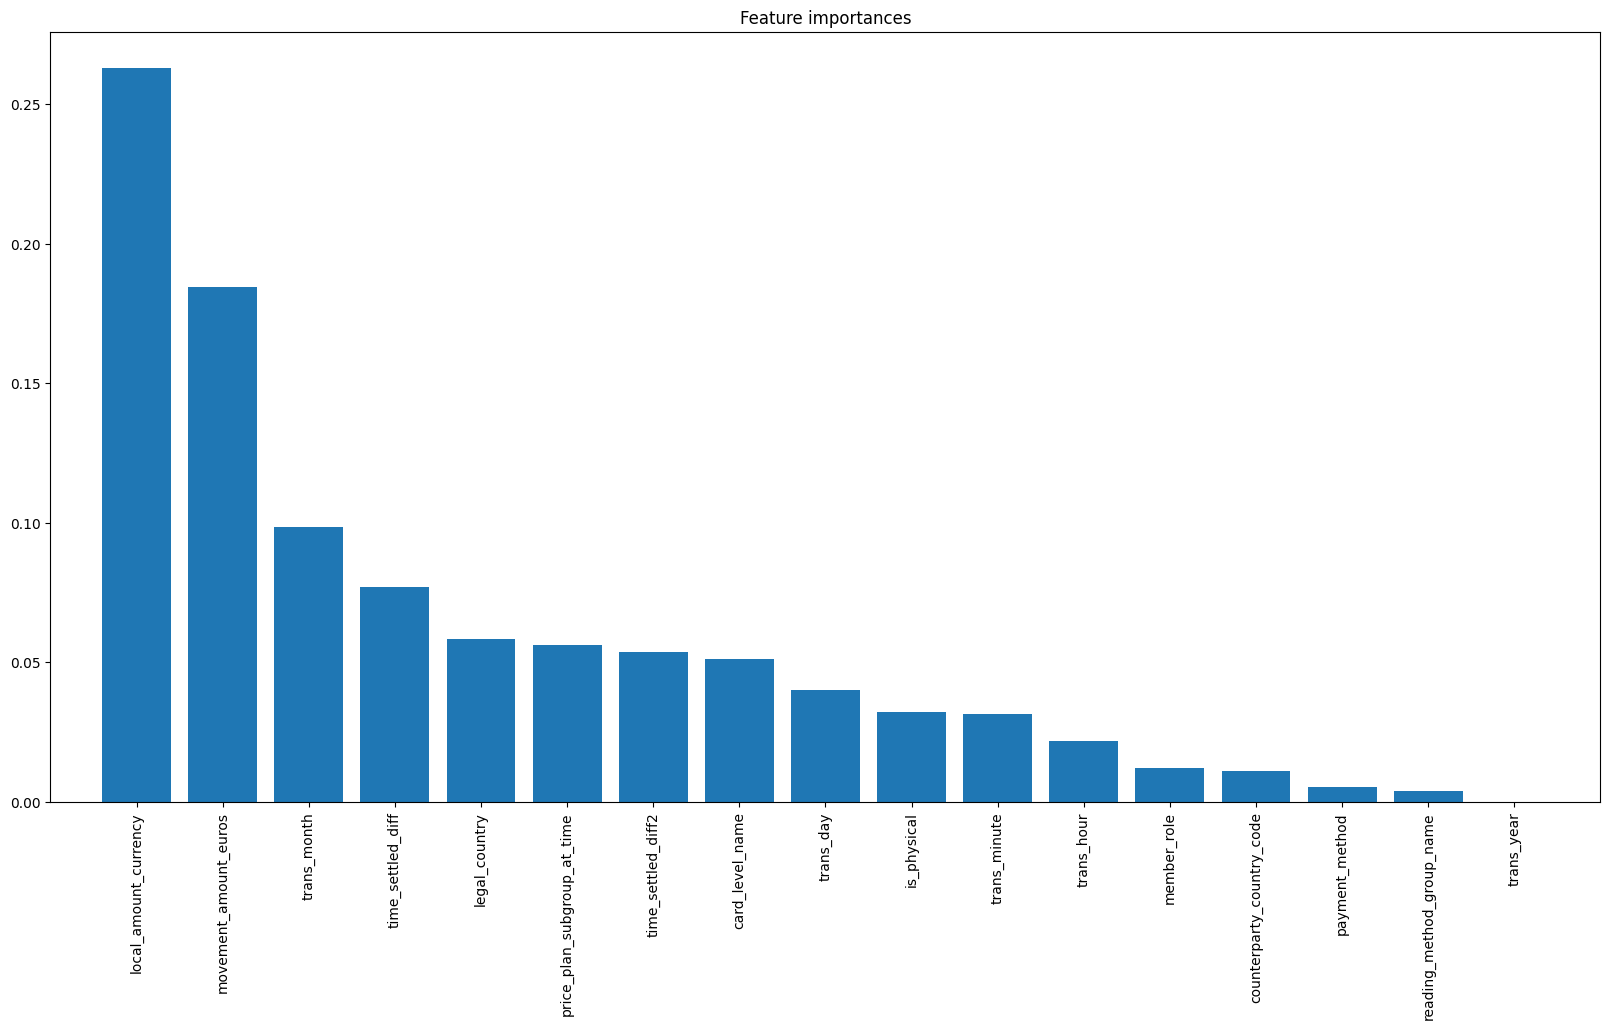

In [43]:
# feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


AUC: 0.9721770970320518


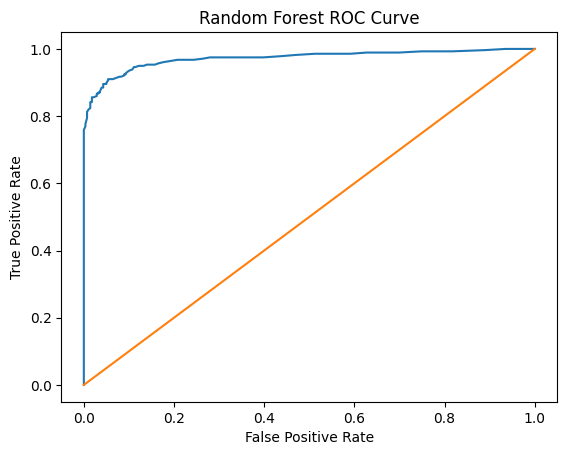

In [44]:
#plot roc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:', auc)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()


In [45]:
# xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [46]:
y_pred2 = xgb.predict(X_test)

print('Accuracy :',accuracy_score(y_test, y_pred2))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred2))

fig = go.Figure(data=[go.Table(header=dict(values=['Accuracy', 'Precision', 'Recall', 'F1 Score']),
                    cells=dict(values=[accuracy_score(y_test, y_pred2), precision_score(y_test, y_pred2), recall_score(y_test, y_pred2), f1_score(y_test, y_pred2)]))
                        ])
fig.show()



Accuracy : 0.9245960502692998
Confusion Matrix : [[266  13]
 [ 29 249]]


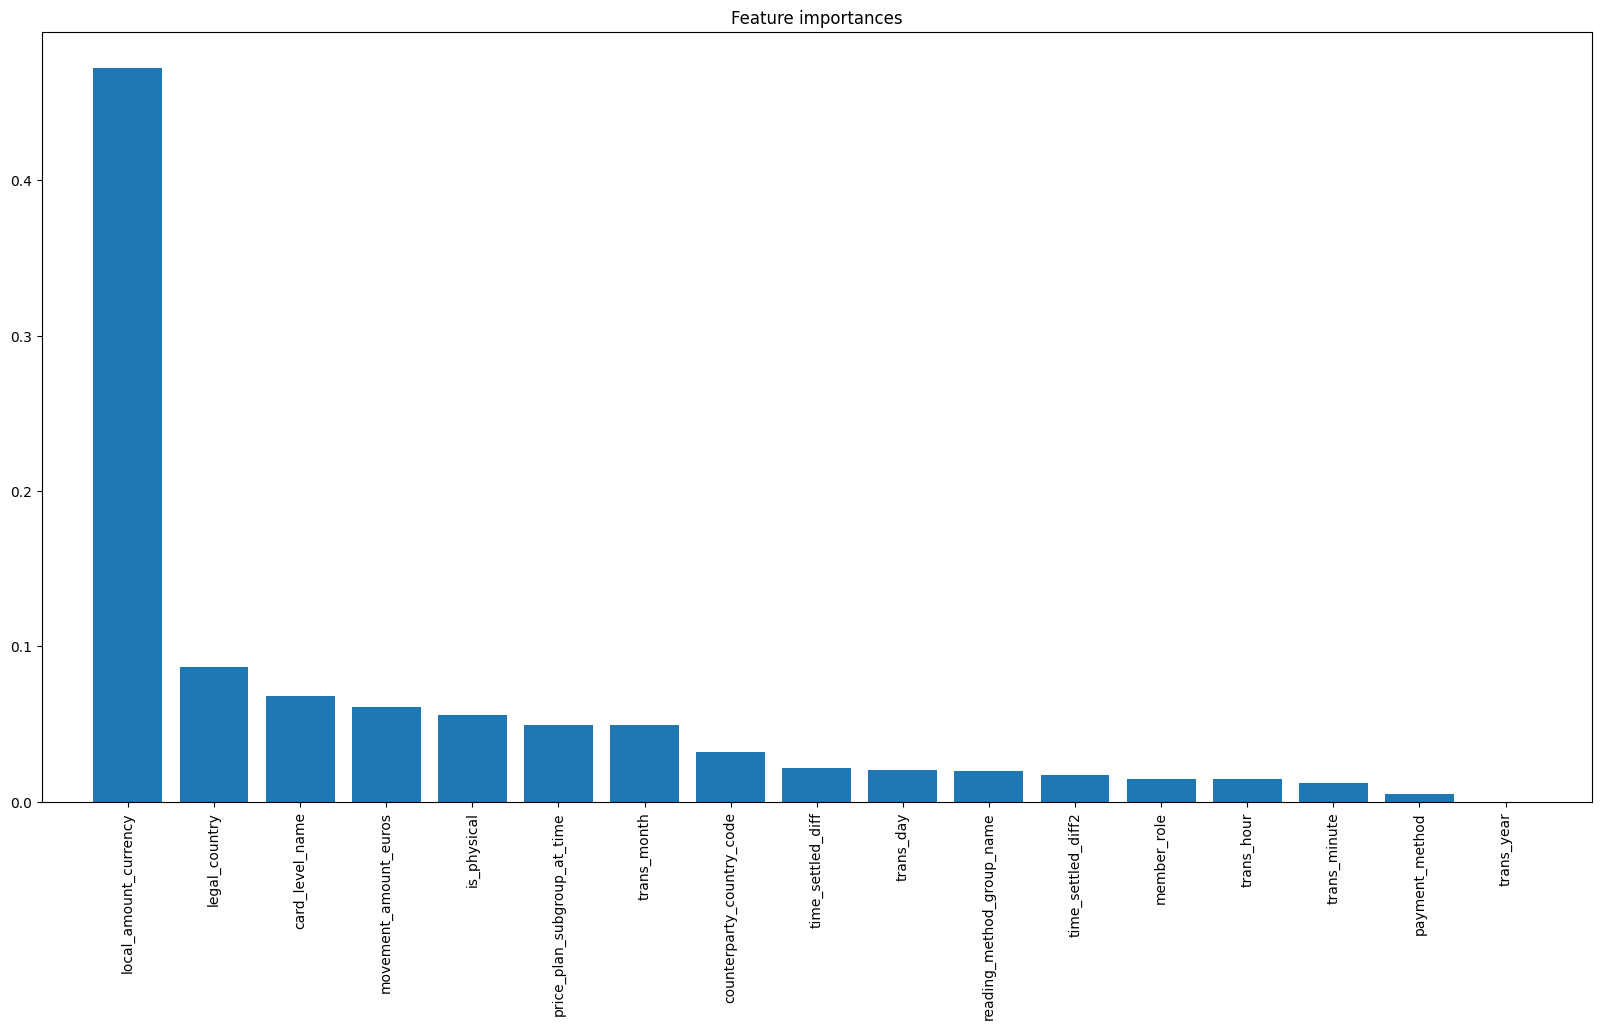

In [47]:
#feature importance
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


#### Try to test the model with all the data test

In [48]:
from sklearn.impute import SimpleImputer
memberRole = {
    'owner': 1,
    'admin': 2,
    'employee': 3,
    'manager': 4,
    'reporting': 5,
}

pricePlanSubgroup = {
    'solo_basic': 1,
    'team_essential': 2,
    'solo_smart': 3,
    'team_business': 4,
    'team_enterprise': 5,
    'solo_premium': 6,
}

manualCountry = {
    'FR': 1,
    'IT': 2,
    'ES': 3,
    'DE': 4,
}

cardLevelName = {
    'physical_one': 1,
    'virtual_one': 2,
    'physical_x': 3,
    'physical_plus': 4,
    'virtual_flash': 5,
}

reading_method_group_name_mapping = {
    'VAD': 1,
    'Other': 2,
    'Chip': 3,
}


def handle_missing_values(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    imputer_num = SimpleImputer(strategy='mean')
    df[num_cols] = imputer_num.fit_transform(df[num_cols])
    
    cat_cols = df.select_dtypes(include=['object']).columns
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
    
    return df
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
import base64

def preprocess_data(df):
    df['member_role'] = df['member_role'].map(memberRole)
    df['price_plan_subgroup_at_time'] = df['price_plan_subgroup_at_time'].map(pricePlanSubgroup)
    df['legal_country'] = df['legal_country'].map(manualCountry)
    df['card_level_name'] = df['card_level_name'].map(cardLevelName)
    df['reading_method_group_name'] = df['reading_method_group_name'].map(reading_method_group_name_mapping)

    le = LabelEncoder()
    df['local_amount_currency'] = le.fit_transform(df['local_amount_currency'])
    df['counterparty_country_code'] = le.fit_transform(df['counterparty_country_code'])
    df['is_physical'] = le.fit_transform(df['is_physical'])
    df['payment_method'] = le.fit_transform(df['payment_method'])

    df['time_settled'] = pd.to_datetime(df['time_settled'])
    df['trans_day'] = df['time_settled'].dt.day
    df['trans_month'] = df['time_settled'].dt.month
    df['trans_year'] = df['time_settled'].dt.year
    df['trans_hour'] = df['time_settled'].dt.hour
    df['trans_minute'] = df['time_settled'].dt.minute
    df.drop(columns=['time_settled'], inplace=True)

    return df


In [54]:
test = pd.read_csv('test.csv')
if 'Unnamed: 0' in test.columns:
        test = test.drop(columns=['Unnamed: 0'])

is_fraud_copy = test['is_fraud'].copy()
if 'is_fraud' in test.columns:
        test = test.drop(columns=['is_fraud'])
test = handle_missing_values(test)
test = preprocess_data(test)
test = test.drop(columns=['card_id', 'card_transaction_id'])

In [55]:
prediction = xgb.predict(test)
print(prediction)

[1 0 1 ... 0 1 1]


In [56]:
prediction_rf = rf.predict(test)
print(prediction_rf)

[0 1 1 ... 0 1 1]


In [58]:
# compare the prediction with the actual values Xgboost
print('Actual values:', is_fraud_copy.values)
print('Predicted values:', prediction)

#accuracy
accuracy = accuracy_score(is_fraud_copy, prediction)
print('Accuracy:', accuracy)

# recall 
recall = recall_score(is_fraud_copy, prediction)
print('Recall:', recall)


Actual values: [0 0 1 ... 0 0 0]
Predicted values: [1 0 1 ... 0 1 1]
Accuracy: 0.788666156992217
Recall: 0.9116379310344828


In [57]:
#compare the prediction with the actual values Random Forest
print('Actual values:', is_fraud_copy.values)
print('Predicted values:', prediction_rf)

#accuracy
accuracy = accuracy_score(is_fraud_copy, prediction_rf)
print('Accuracy:', accuracy)

#Recall
recall = recall_score(is_fraud_copy, prediction_rf)
print('Recall:', recall)


Actual values: [0 0 1 ... 0 0 0]
Predicted values: [0 1 1 ... 0 1 1]
Accuracy: 0.7449016946959236
Recall: 0.9403735632183908
